# The Matplotlib Jupyter Widget Backend

Enabling interaction with matplotlib charts in the Jupyter notebook and JupyterLab

https://github.com/matplotlib/jupyter-matplotlib

In [12]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/andrewgaitskell/Software/anaconda3/envs/env_voila/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [13]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
##%matplotlib widget

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
import numpy as np

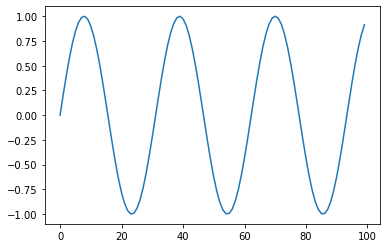

In [16]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

# 3D plotting

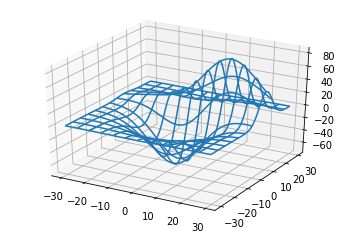

In [17]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

# Subplots

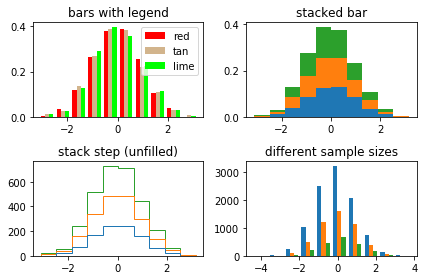

In [18]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

# Interactions with other widgets and layouting

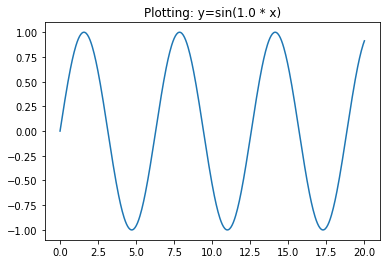

In [21]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')
